<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Quantitative_Financial_Analysis_in_the_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Annual Returns:
 Stock_A   -0.070819
Stock_B    0.074067
Stock_C    0.304553
dtype: float64
Annualized Volatility:
 Stock_A    0.162045
Stock_B    0.157573
Stock_C    0.144746
dtype: float64
Correlation Matrix:
           Stock_A   Stock_B   Stock_C
Stock_A  1.000000  0.076988  0.058005
Stock_B  0.076988  1.000000  0.090101
Stock_C  0.058005  0.090101  1.000000


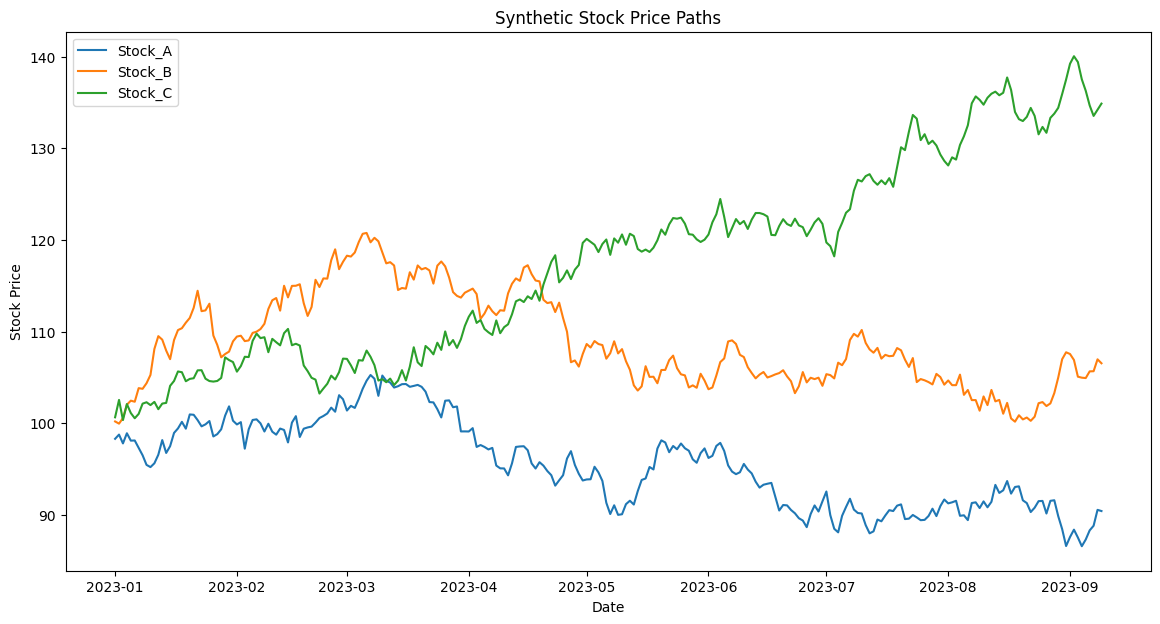

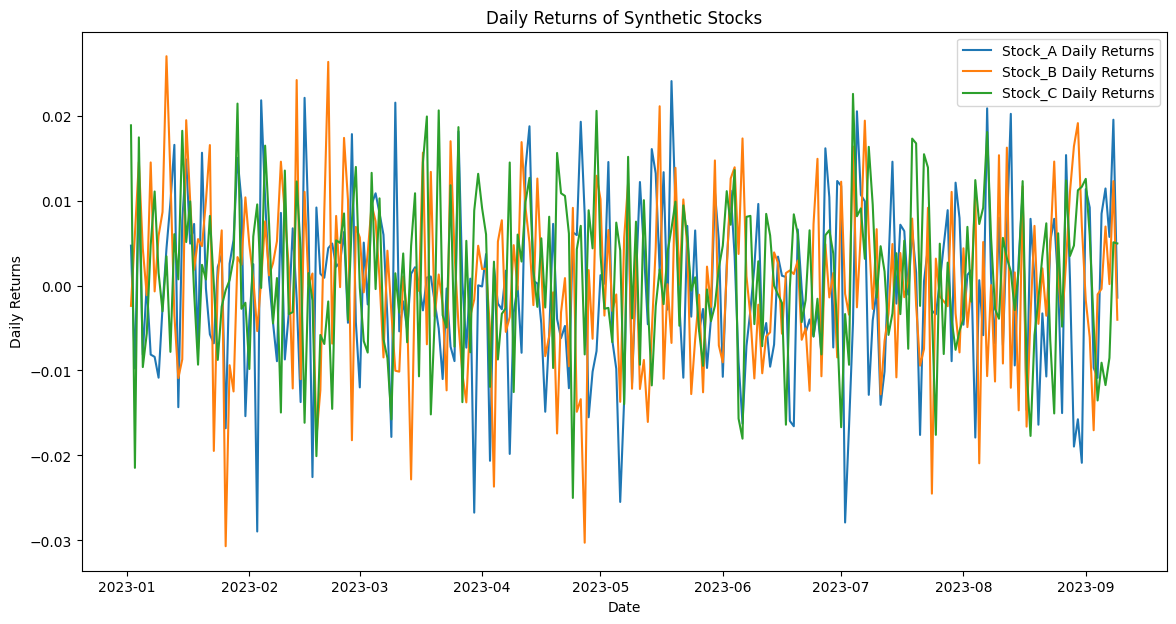

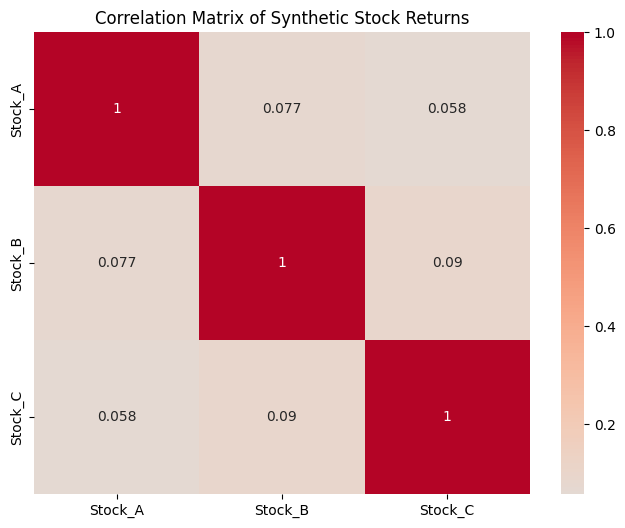

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate synthetic stock price data using Geometric Brownian Motion
def generate_stock_price_paths(num_days=252, num_stocks=3, mu=0.0005, sigma=0.01):
    """
    Generates synthetic stock price paths using Geometric Brownian Motion.
    Args:
        num_days (int): Number of trading days (e.g., 252 for one trading year).
        num_stocks (int): Number of stocks to simulate.
        mu (float): Expected daily return.
        sigma (float): Daily volatility.
    Returns:
        DataFrame: Synthetic stock price paths.
    """
    dates = pd.date_range(start="2023-01-01", periods=num_days)
    prices = pd.DataFrame(index=dates)

    for i in range(num_stocks):
        stock_name = f"Stock_{chr(65 + i)}"
        # Initial stock price
        initial_price = 100
        # Generate daily returns
        returns = np.random.normal(mu, sigma, num_days)
        # Create price path
        prices[stock_name] = initial_price * np.cumprod(1 + returns)

    return prices

# Generate synthetic data for three stocks over one trading year
df_prices = generate_stock_price_paths()

# Step 2: Calculate daily returns
returns = df_prices.pct_change().dropna()

# Step 3: Statistical Analysis - Mean return and volatility
mean_returns = returns.mean() * 252  # Annualized mean return
volatility = returns.std() * np.sqrt(252)  # Annualized volatility
print("Mean Annual Returns:\n", mean_returns)
print("Annualized Volatility:\n", volatility)

# Step 4: Correlation Analysis between stocks
correlation_matrix = returns.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Step 5: Visualization of stock prices, returns, and correlation

# Plot the synthetic stock price paths
plt.figure(figsize=(14, 7))
for stock in df_prices.columns:
    plt.plot(df_prices.index, df_prices[stock], label=stock)
plt.title('Synthetic Stock Price Paths')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot the daily returns for each stock
plt.figure(figsize=(14, 7))
for stock in returns.columns:
    plt.plot(returns.index, returns[stock], label=f'{stock} Daily Returns')
plt.title('Daily Returns of Synthetic Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Synthetic Stock Returns")
plt.show()
